In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))
pd.set_option("display.max_columns", 45)

In [ ]:
df = pd.read_csv('Data/datas0402.csv')
df.이름.unique()

In [ ]:
year = pd.read_csv('./year_start2.csv')
year.이름.unique()

In [ ]:
year = year[year['데뷔'] != 0]

In [5]:
df= pd.merge(df, year, on='이름', how='inner')

In [6]:
df = df.drop_duplicates()

In [7]:
df['경험N'] = df['시즌'] - df['데뷔'] 
#d['횟수'] = 1
#for id_x in d.ID.unique():
#    d["횟수"].loc[d[d["ID"] == id_x].reset_index()["index"]] = list(d[d["ID"] == id_x].reset_index().reset_index()["level_0"] + 1)


In [8]:
train = df[df.시즌 <= 2017]
test = df[df.시즌 == 2018]

In [9]:
import re
names = df.이름.unique()
df['외국인'] = None
for name in names:
    if re.findall('[에, 브, 워, 대, 피, 히, 버, 러, 칸, 루, 필, 파, 스, 아,마, 가, 초, 모, 로, 발, 번, 테, 호]', name[0]):
        df['외국인'][df['이름'] == name] = 1
    else:
        df['외국인'][df['이름'] == name] = 0

In [10]:
df['BABIP'] = (df['안타'] - df['홈런'])/(df['타수'] - df['삼진']-df['홈런'] - df['희비'])

In [11]:
a = ['나바로', '조쉬벨', '고메즈']
for name in a:
    df['외국인'][df['이름'] == name] = 1

In [12]:
df['이적'] = None
for x in df['이름']:
    df['이적'][df['이름'] == x] = len(df[df['이름'] == x]['팀'].unique())

In [13]:
df['이적C'] = df.이적.apply(lambda x: 0 if x == 1 else x)
df['이적C'] = df.이적C.apply(lambda x: 1 if x == 2 else x)
df['이적C'] = df.이적C.apply(lambda x: 2 if x == 3 else x)
df['이적C'] = df.이적C.apply(lambda x: 3 if x >= 3 else x)

In [14]:
df.이적C.unique()

array([0, 2, 1, 3])

In [15]:
df['나이C'] = df.나이.apply(lambda x: 0 if x <= 23 else x)
df['나이C'] = df.나이C.apply(lambda x: 1 if 26 >= x > 23 else x)
df['나이C'] = df.나이C.apply(lambda x: 2 if 33 >= x > 26 else x)
df['나이C'] = df.나이C.apply(lambda x: 3 if 37 >= x > 33 else x)
df['나이C'] = df.나이C.apply(lambda x: 4 if 40 >= x > 37 else x)
df['나이C'] = df.나이C.apply(lambda x: 5 if x >= 40 else x)

In [16]:
df.groupby('시즌').median()['연봉']

시즌
2010    16200.0
2011    18750.0
2012    18000.0
2013    20000.0
2014    37000.0
2015    50000.0
2016    50000.0
2017    50000.0
2018    50000.0
Name: 연봉, dtype: float64

In [17]:
df[df['경험N'] == -4]

,ID,이름,시즌,팀,포지션,나이,G,타석,타수,득점,안타,타1,타2,타3,홈런,루타,타점,도루,도실,볼넷,사구,고4,...,희비,타율,출루,장타,OPS,wOBA,wRC,twoBLUCK,threeBLUCK,ISO,BBK,ISOD,연봉,횟수,경험,데뷔,경험N,외국인,BABIP,이적,이적C,나이C


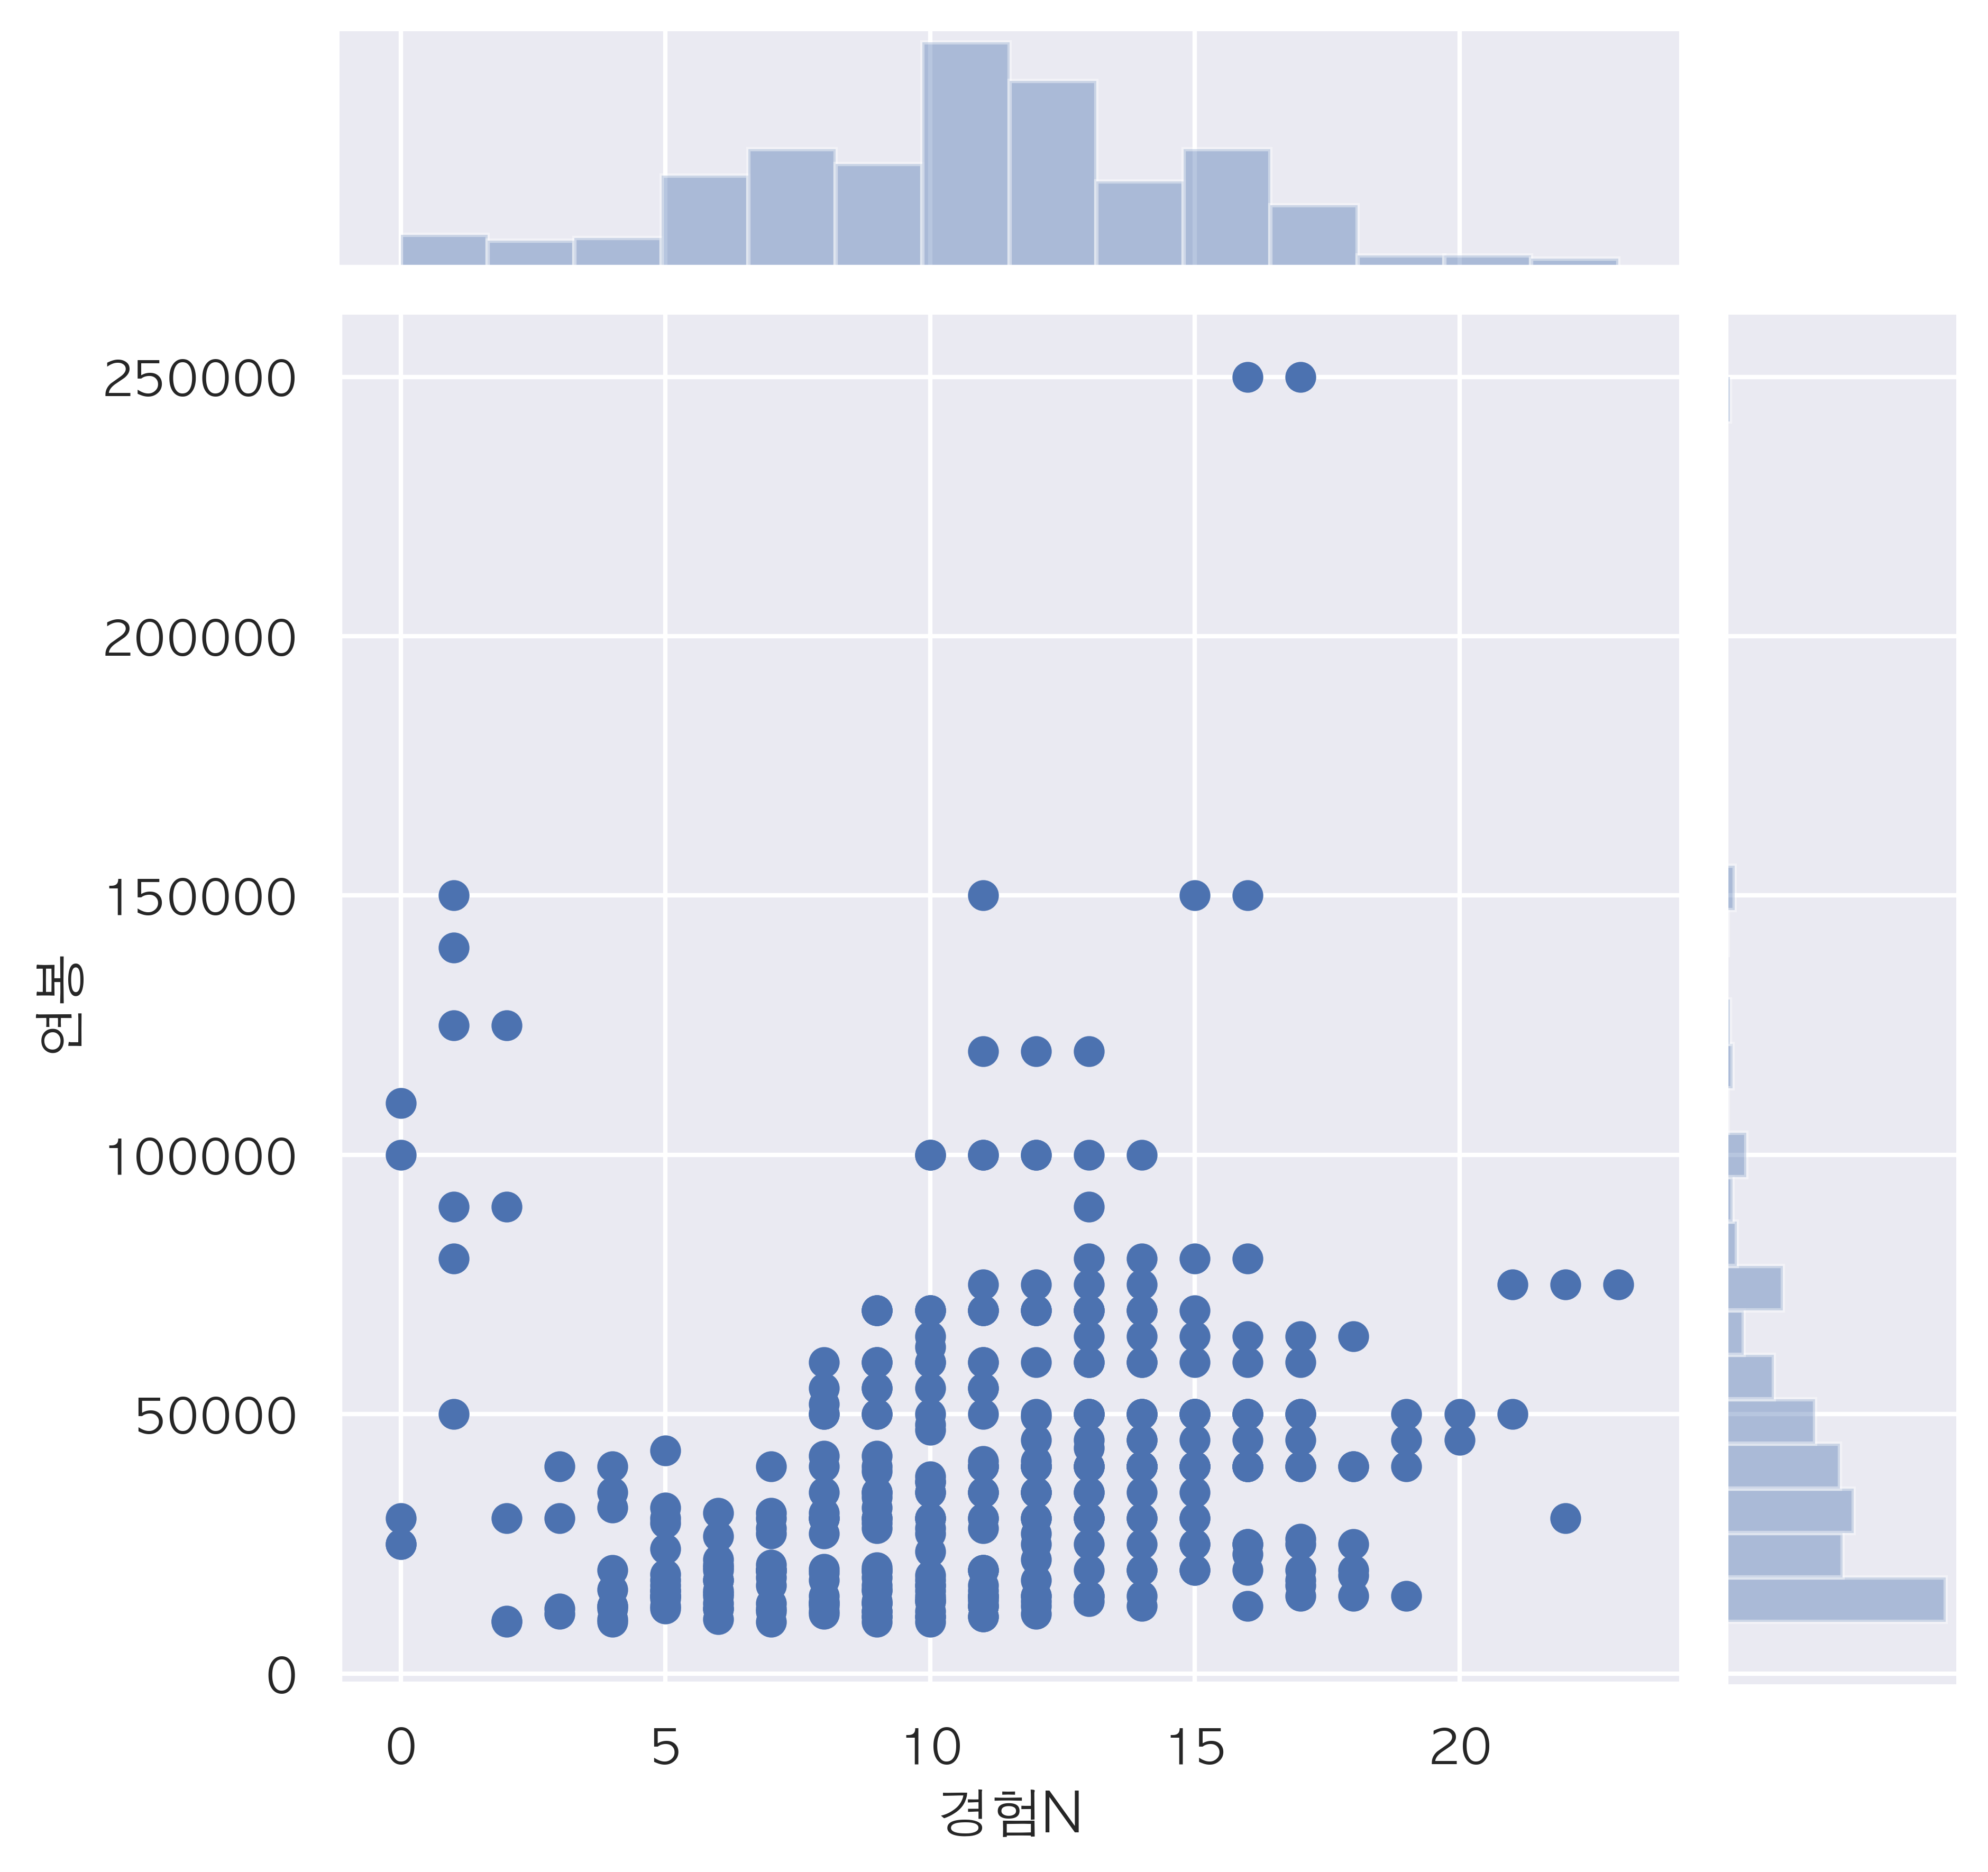

In [18]:
sns.jointplot(x='경험N', y='연봉', data=df)
plt.show()

In [19]:
df['경험C'] = df.경험.apply(lambda x: 0 if x <= 3 else x)
df['경험C'] = df.경험C.apply(lambda x : 1 if x==4 else x)
df['경험C'] = df.경험C.apply(lambda x : 2 if 5<=x else x)
df['경험C'].unique()

array([0, 2, 1])

In [20]:
df['시즌C'] = df.시즌.apply(lambda x: 0 if x <= 2013 else x)
df['시즌C'] = df.시즌C.apply(lambda x: 1 if 2014 >= x > 2013 else x)
df['시즌C'] = df.시즌C.apply(lambda x: 2 if x > 2015 else x)

In [21]:
df.columns

Index(['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1',
       '타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살',
       '희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK',
       'threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '경험N',
       '외국인', 'BABIP', '이적', '이적C', '나이C', '경험C', '시즌C'],
      dtype='object')

In [22]:
df['K'] = df['삼진']/(df['타석'] - df['고4'])

In [23]:
df['로그연봉'] = np.log(df['연봉'])

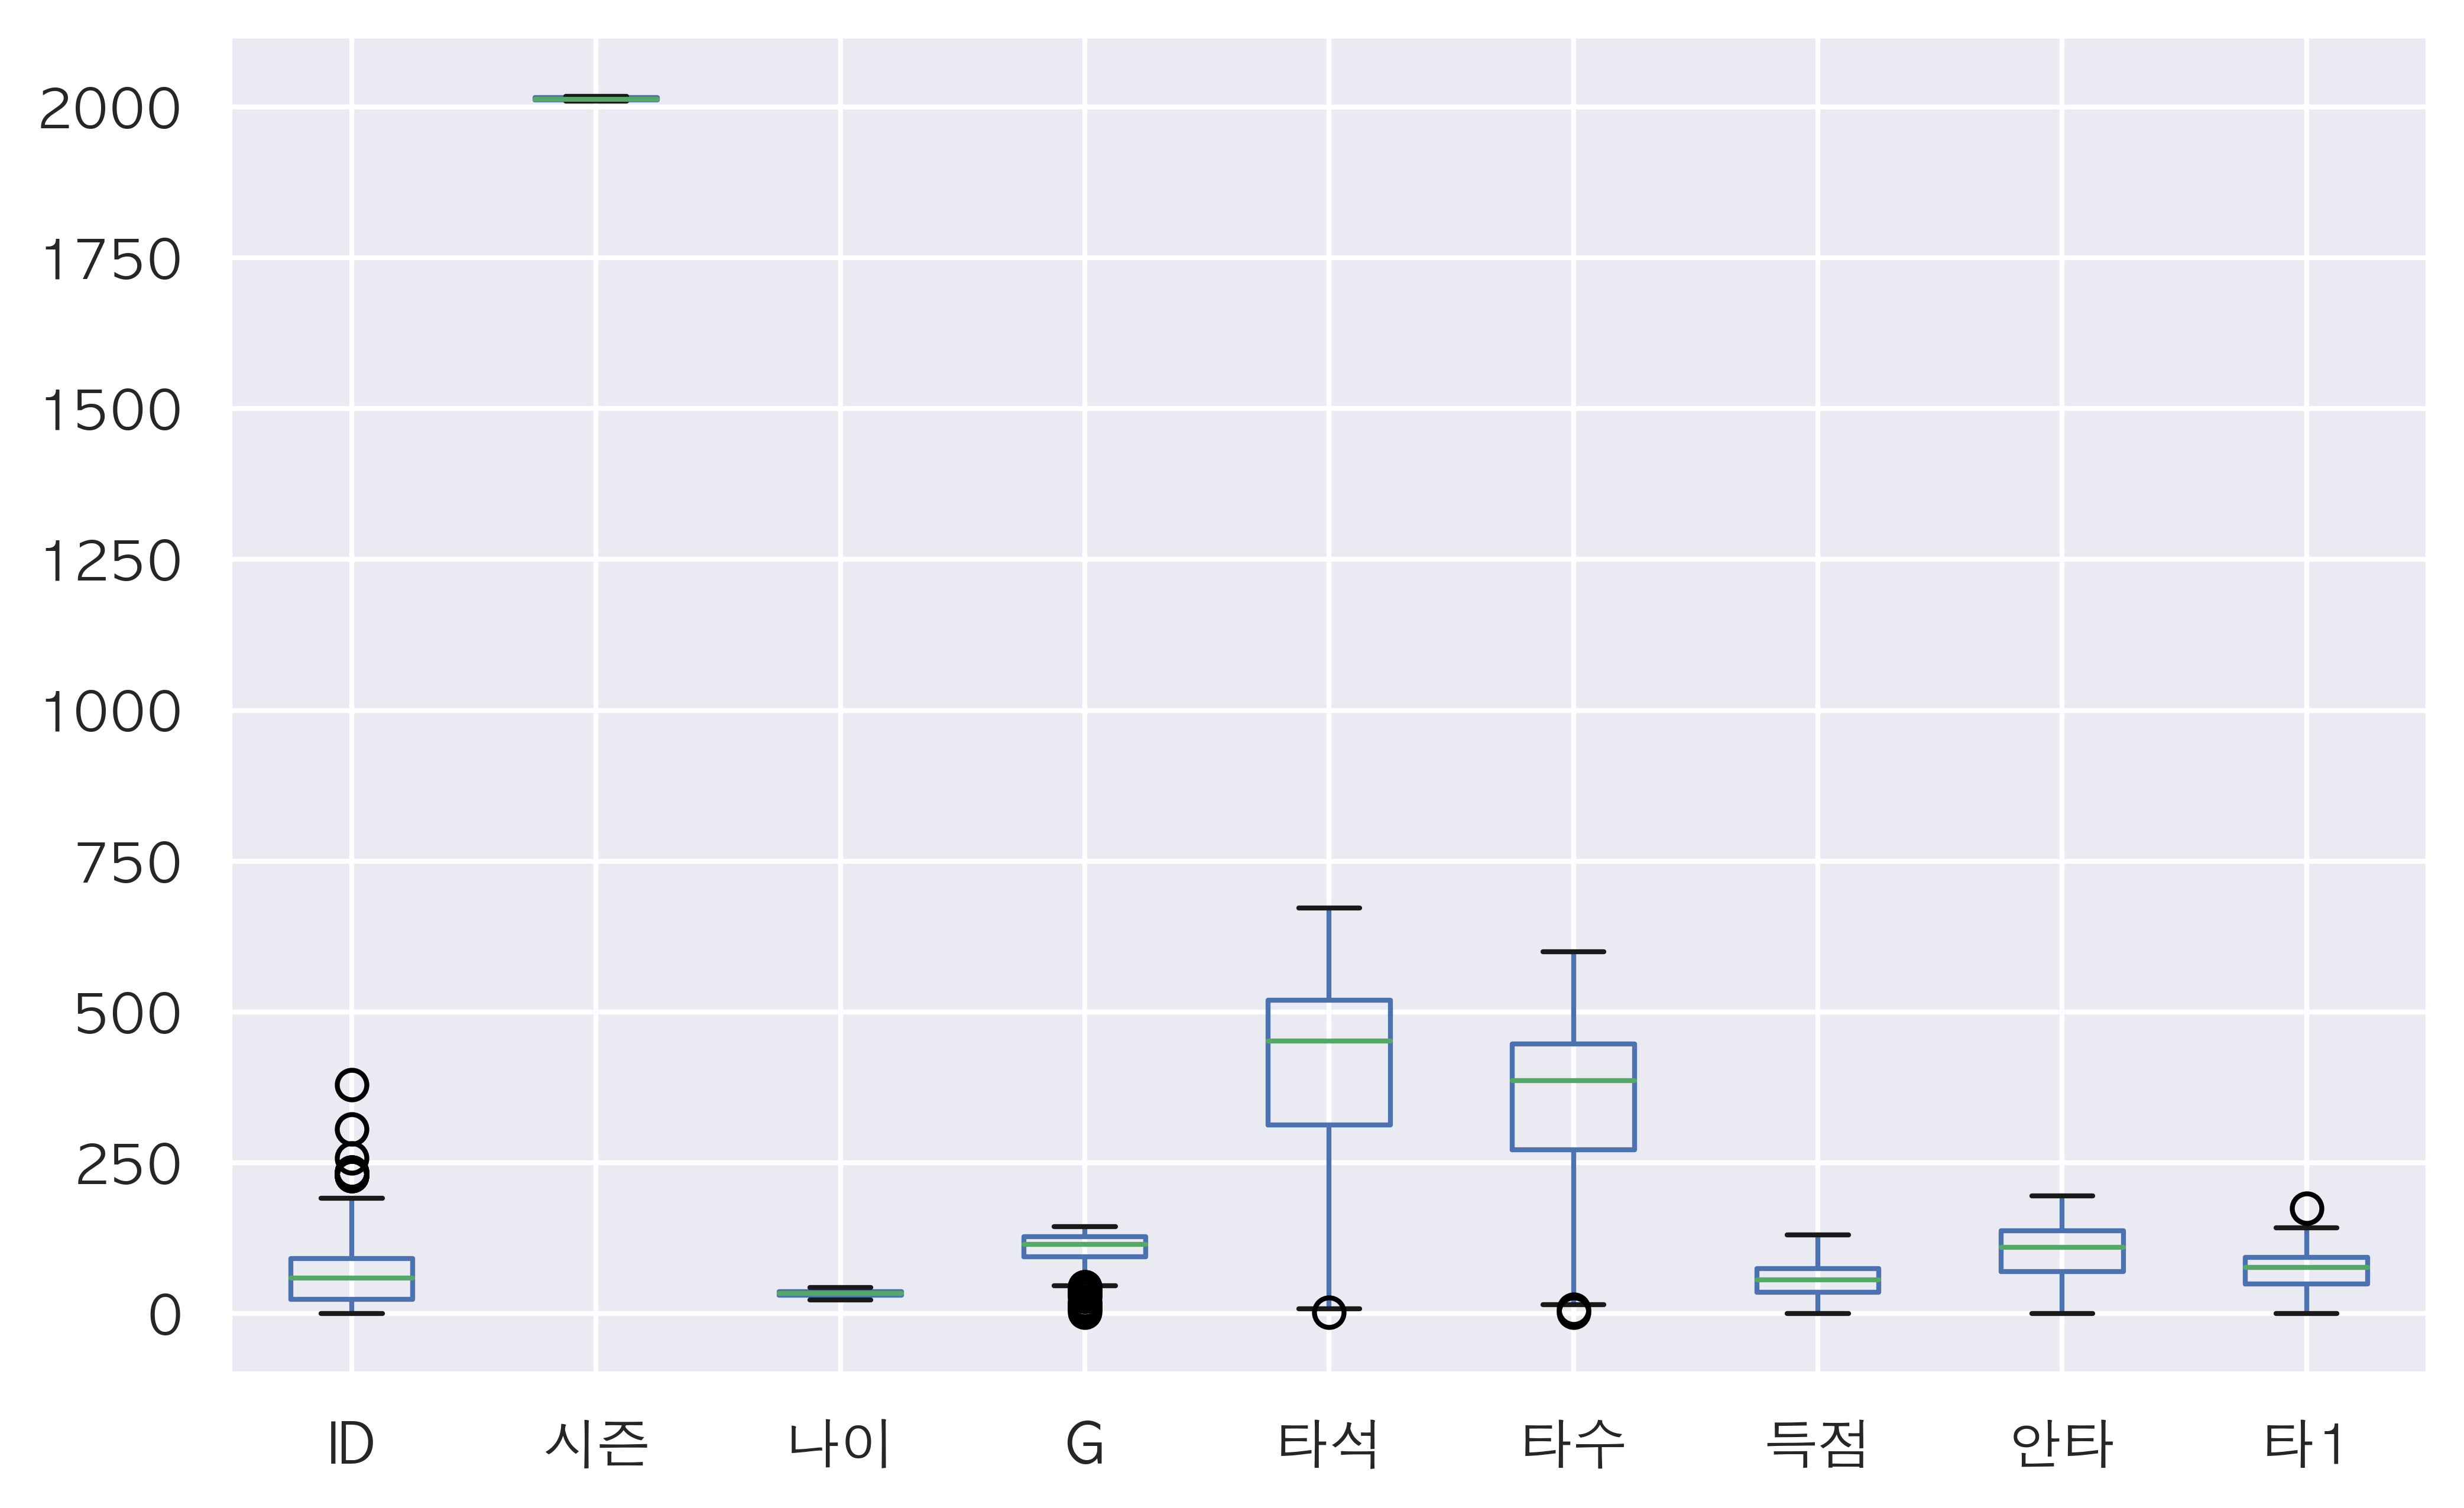

In [38]:
df[['ID', '이름', '시즌', '팀', '포지션', '나이', 'G', '타석', '타수', '득점', '안타', '타1']].plot.box()
plt.show()

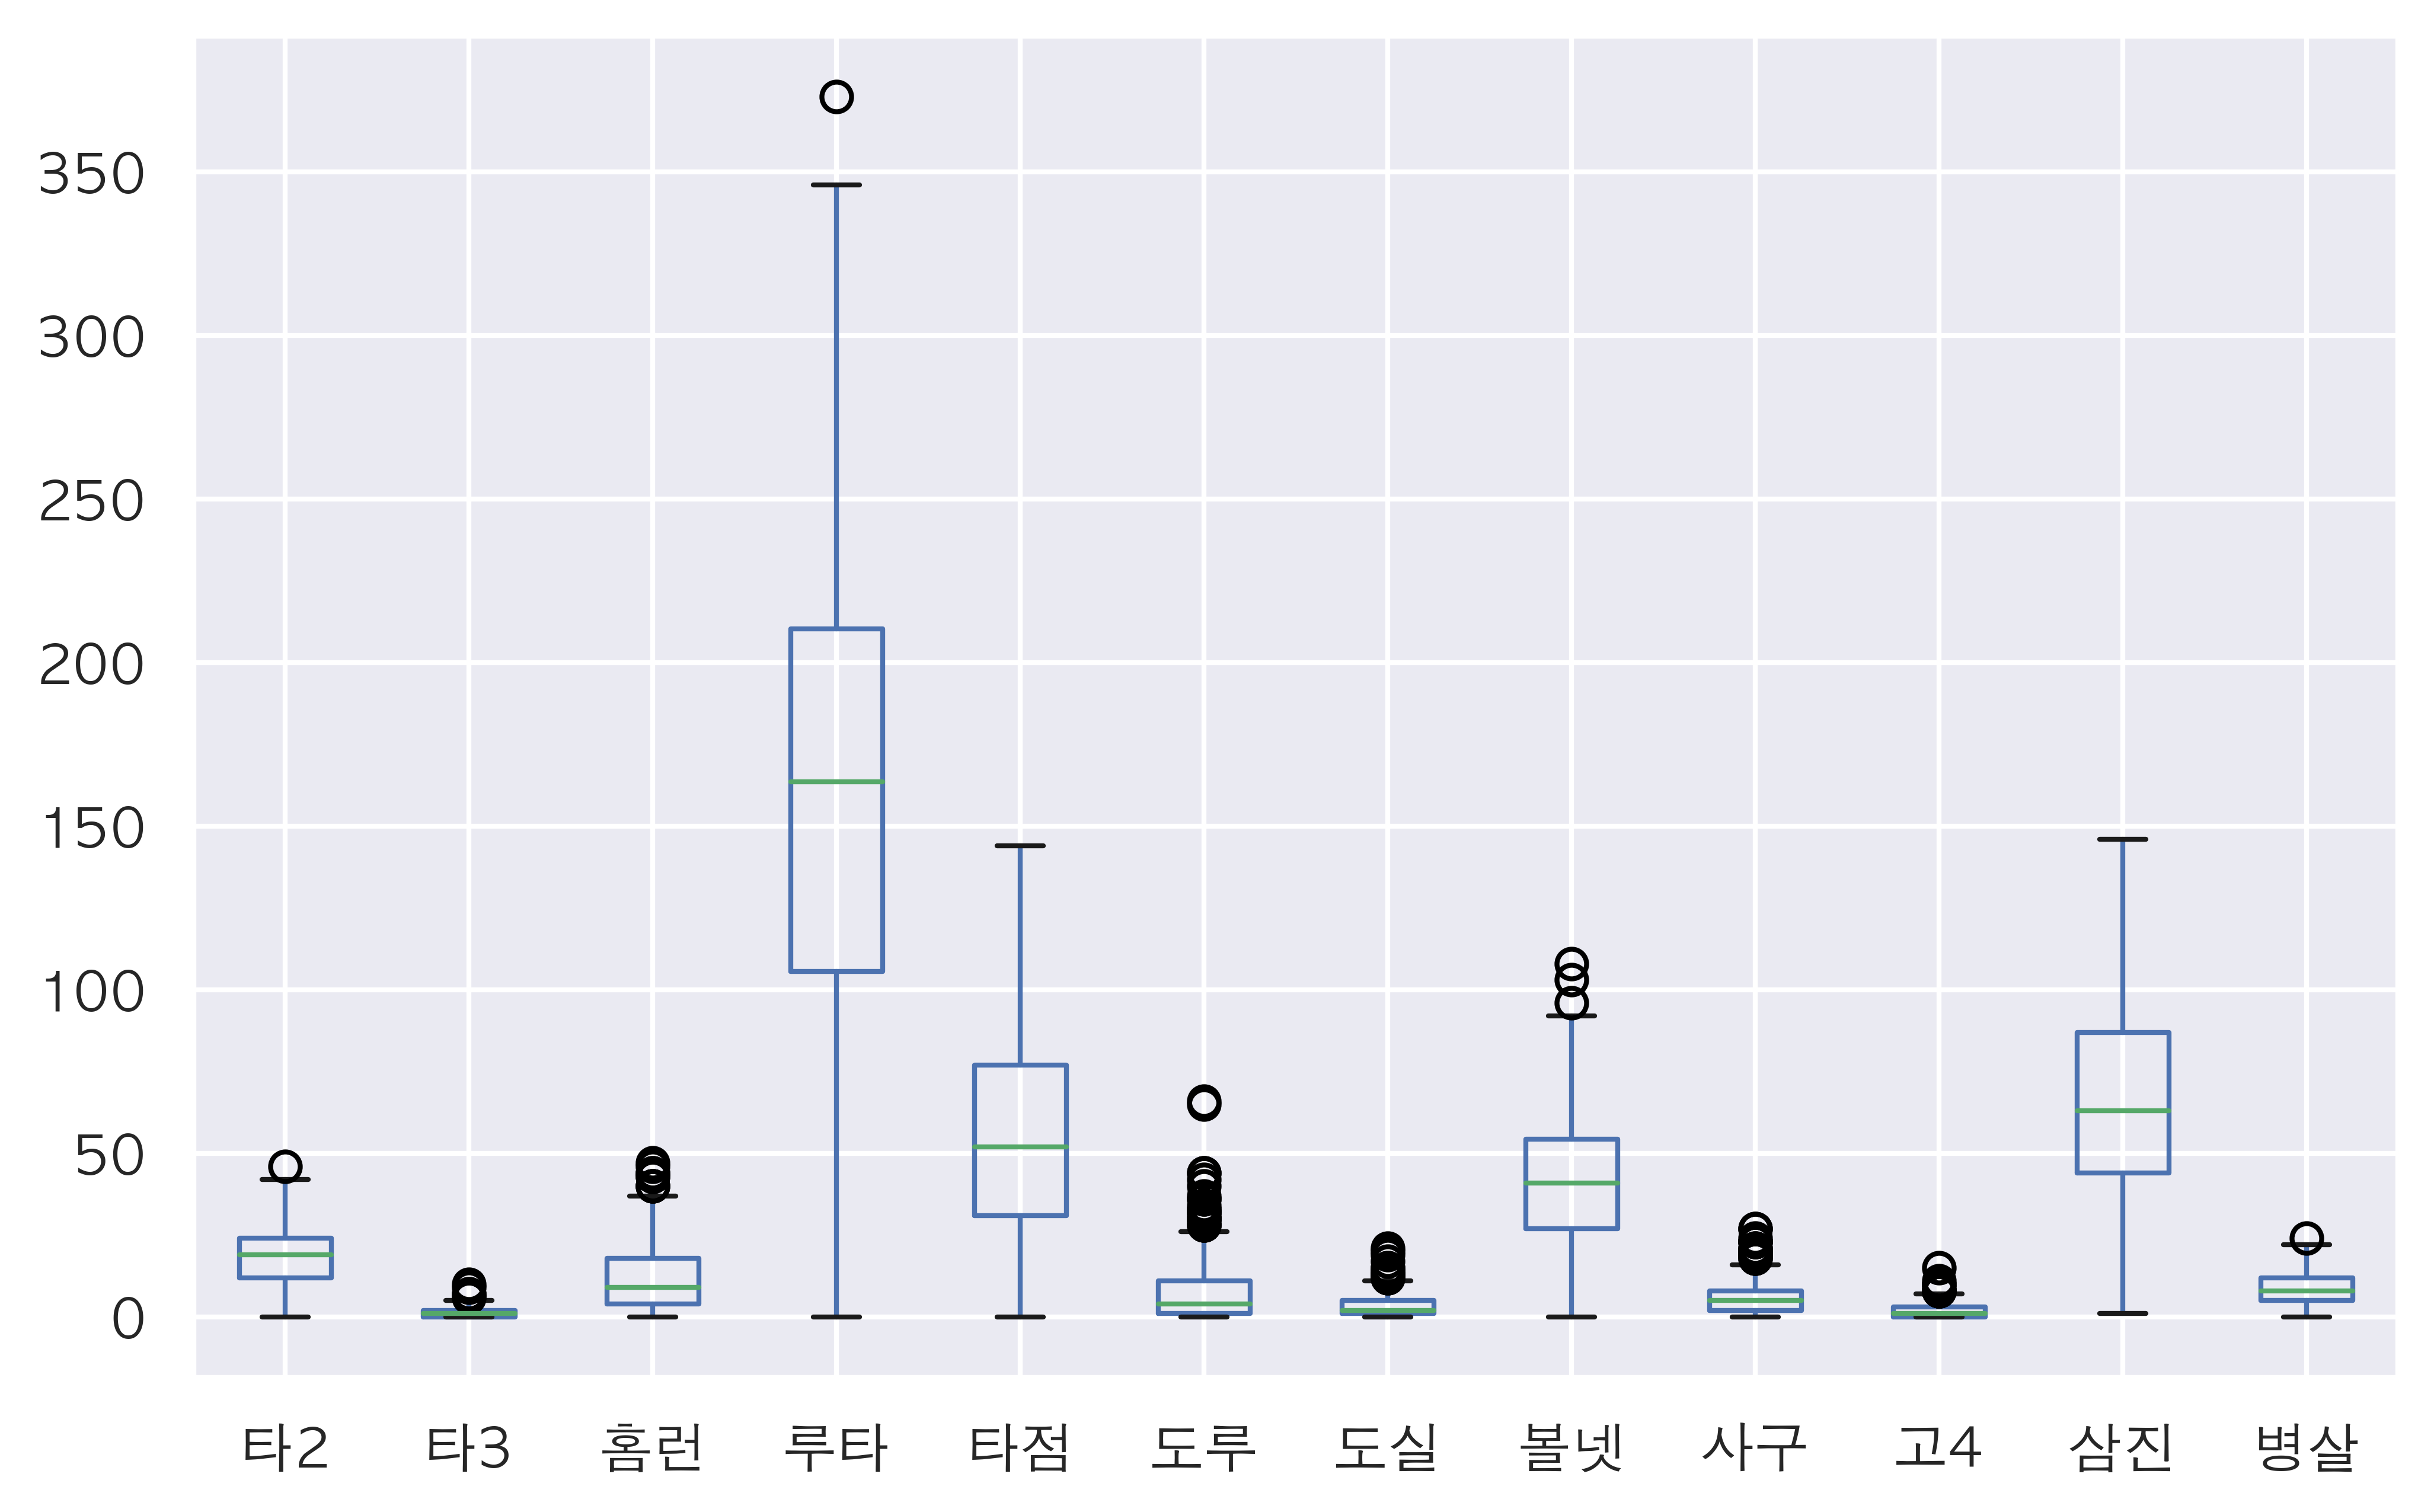

In [39]:
df[['타2', '타3', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살']].plot.box()
plt.show()

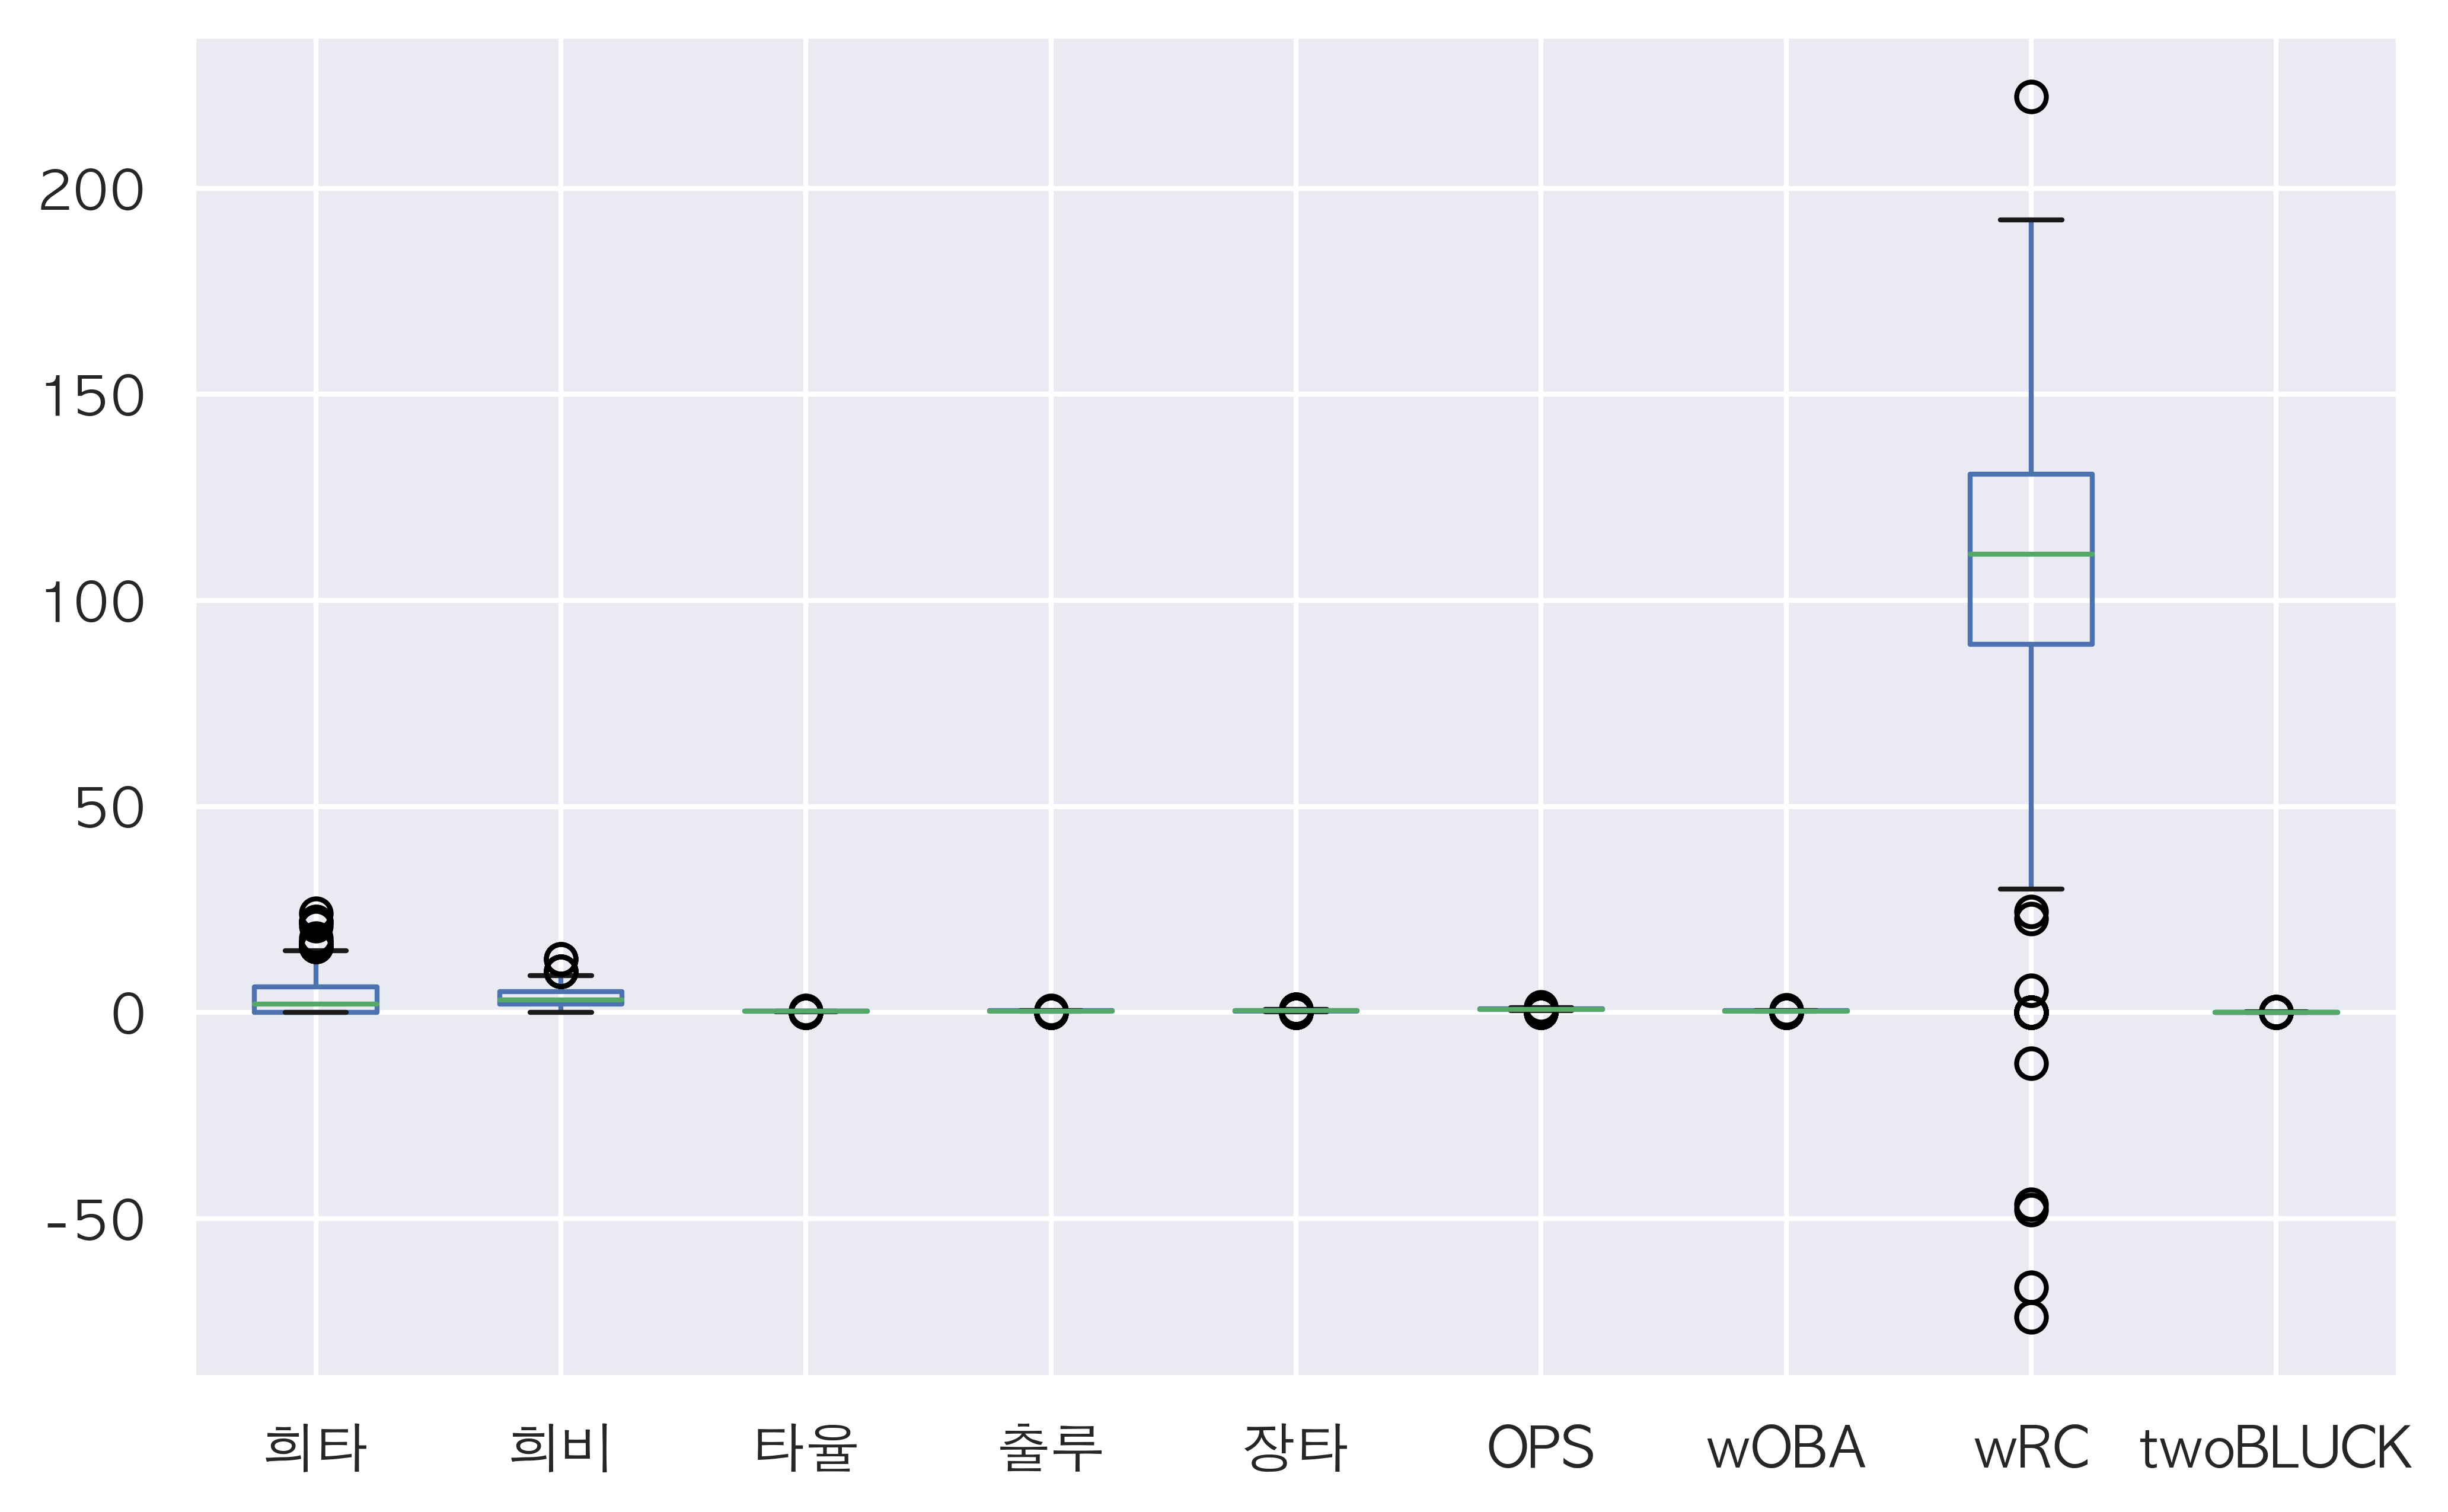

In [40]:
df[['희타', '희비', '타율', '출루', '장타', 'OPS', 'wOBA', 'wRC', 'twoBLUCK']].plot.box()
plt.show()

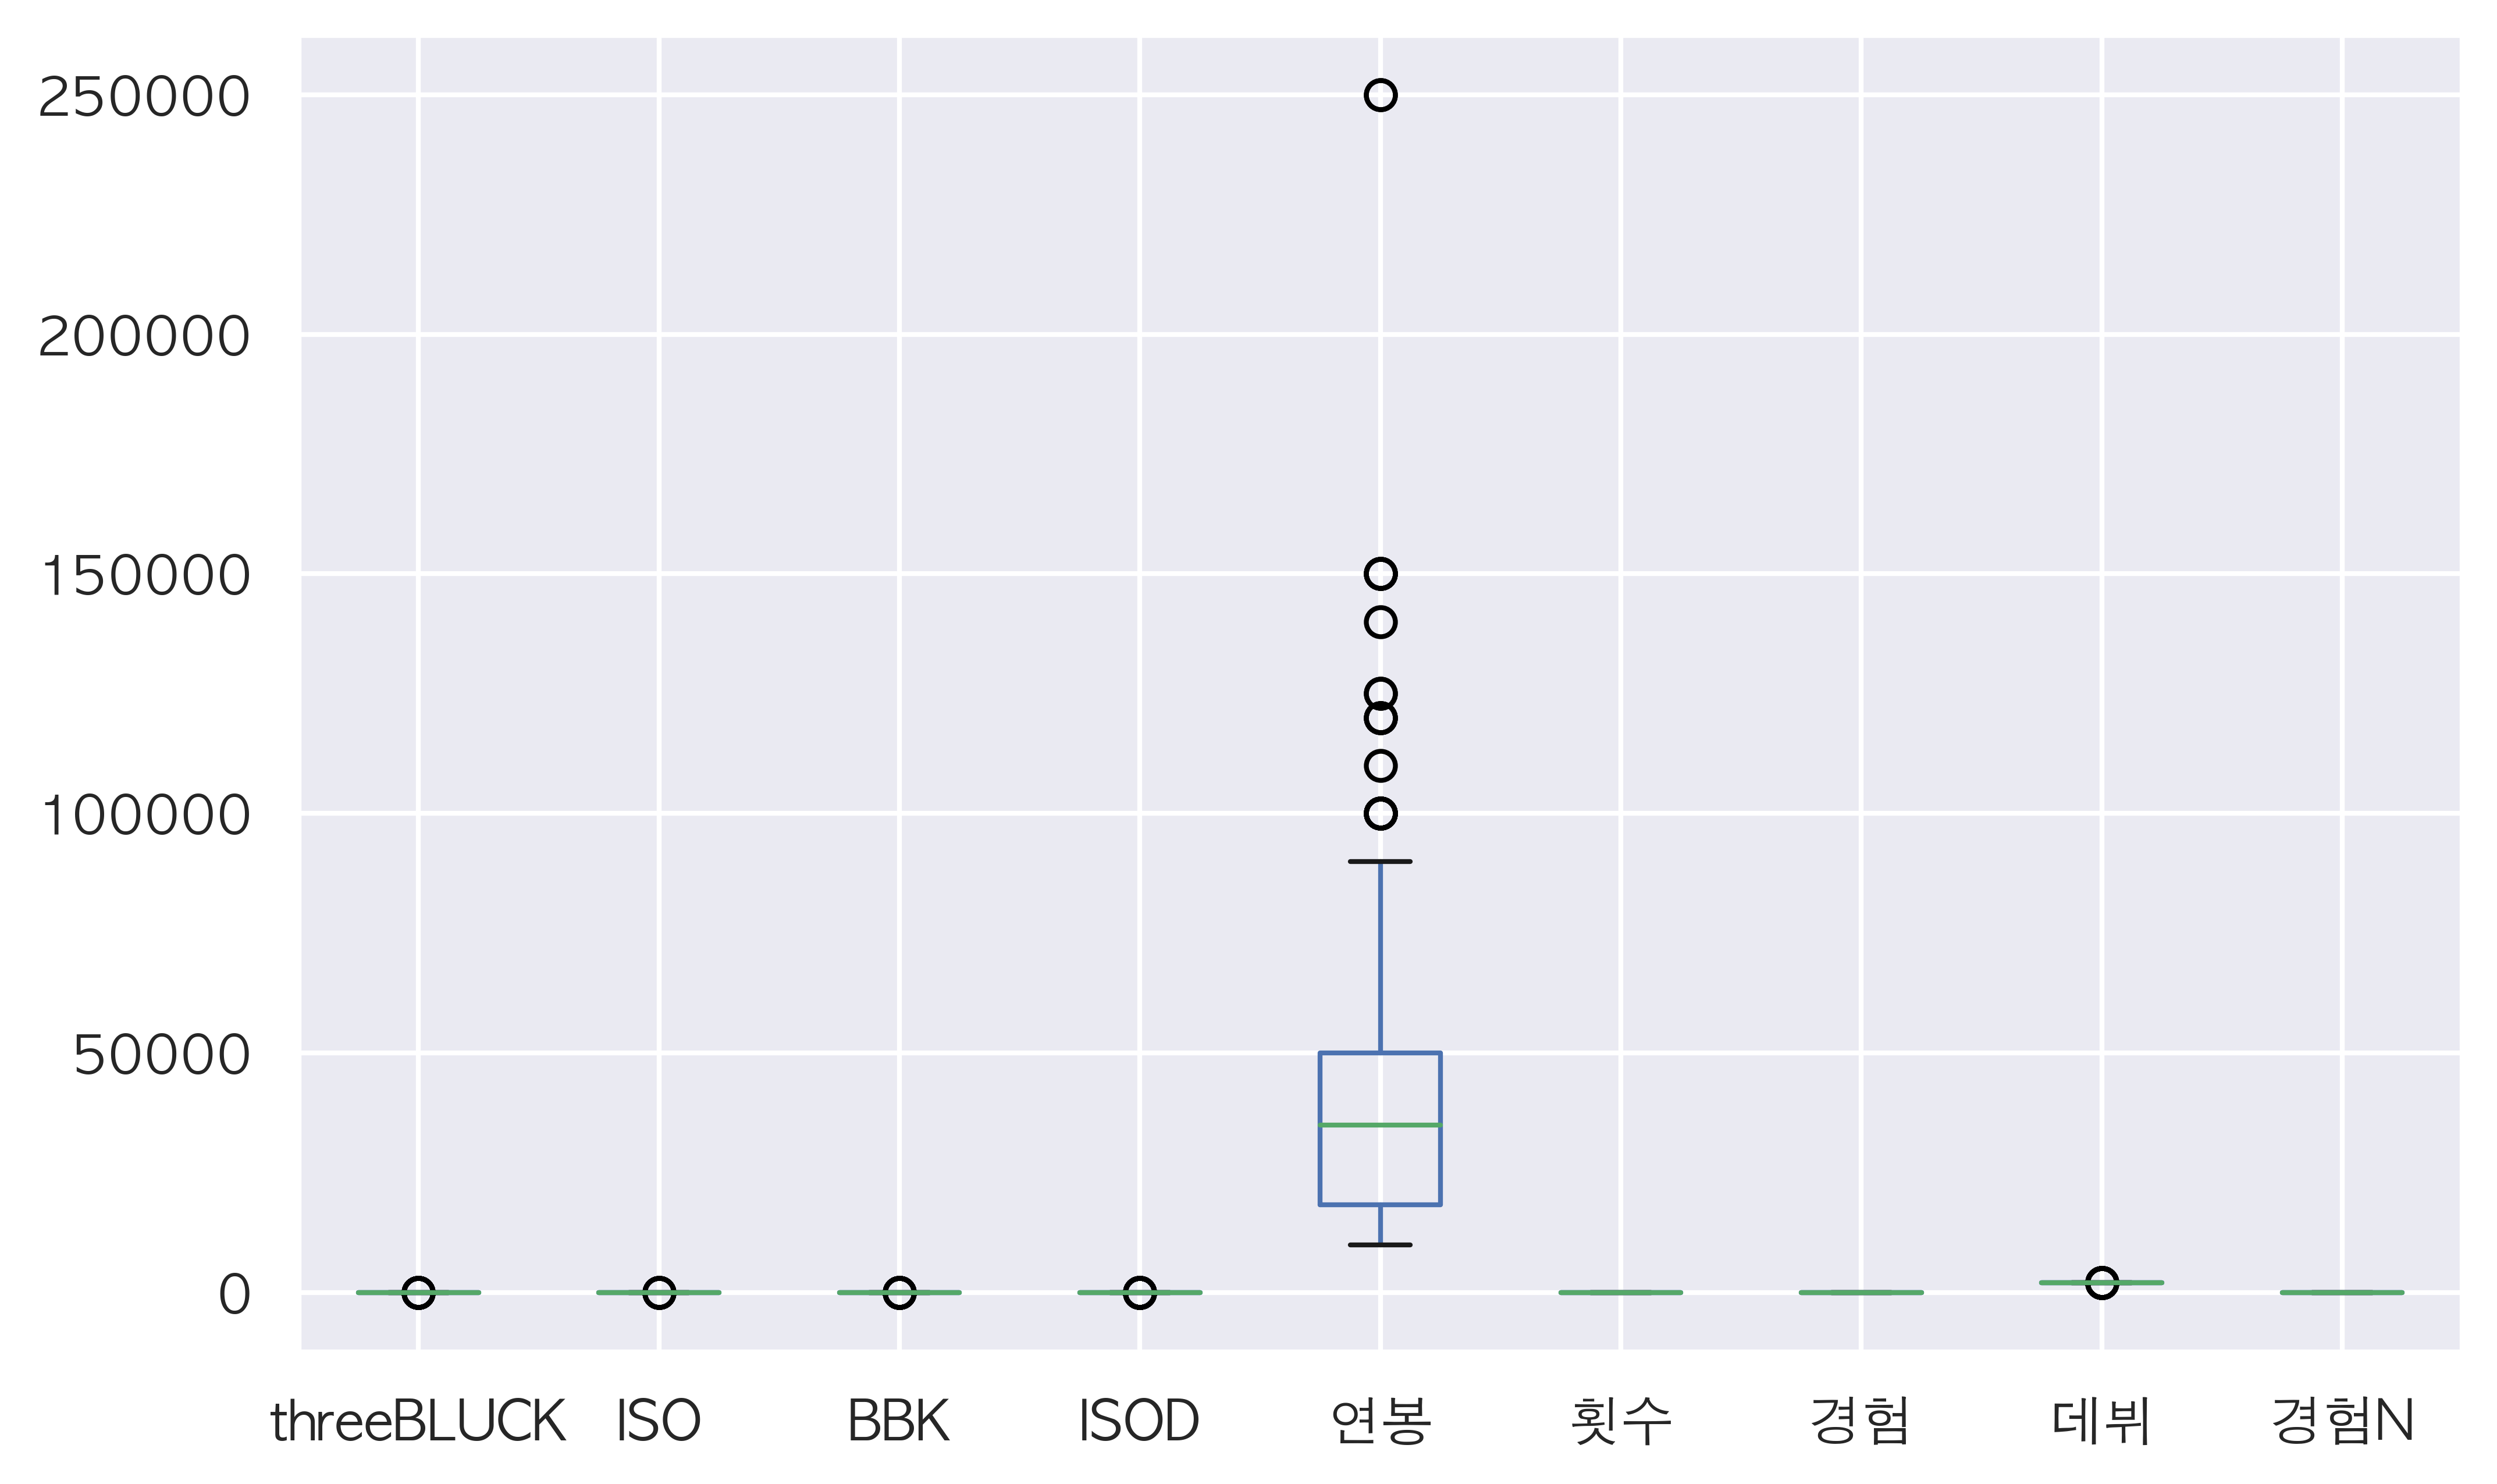

In [41]:
df[['threeBLUCK', 'ISO', 'BBK', 'ISOD', '연봉', '횟수', '경험', '데뷔', '경험N']].plot.box()
plt.show()

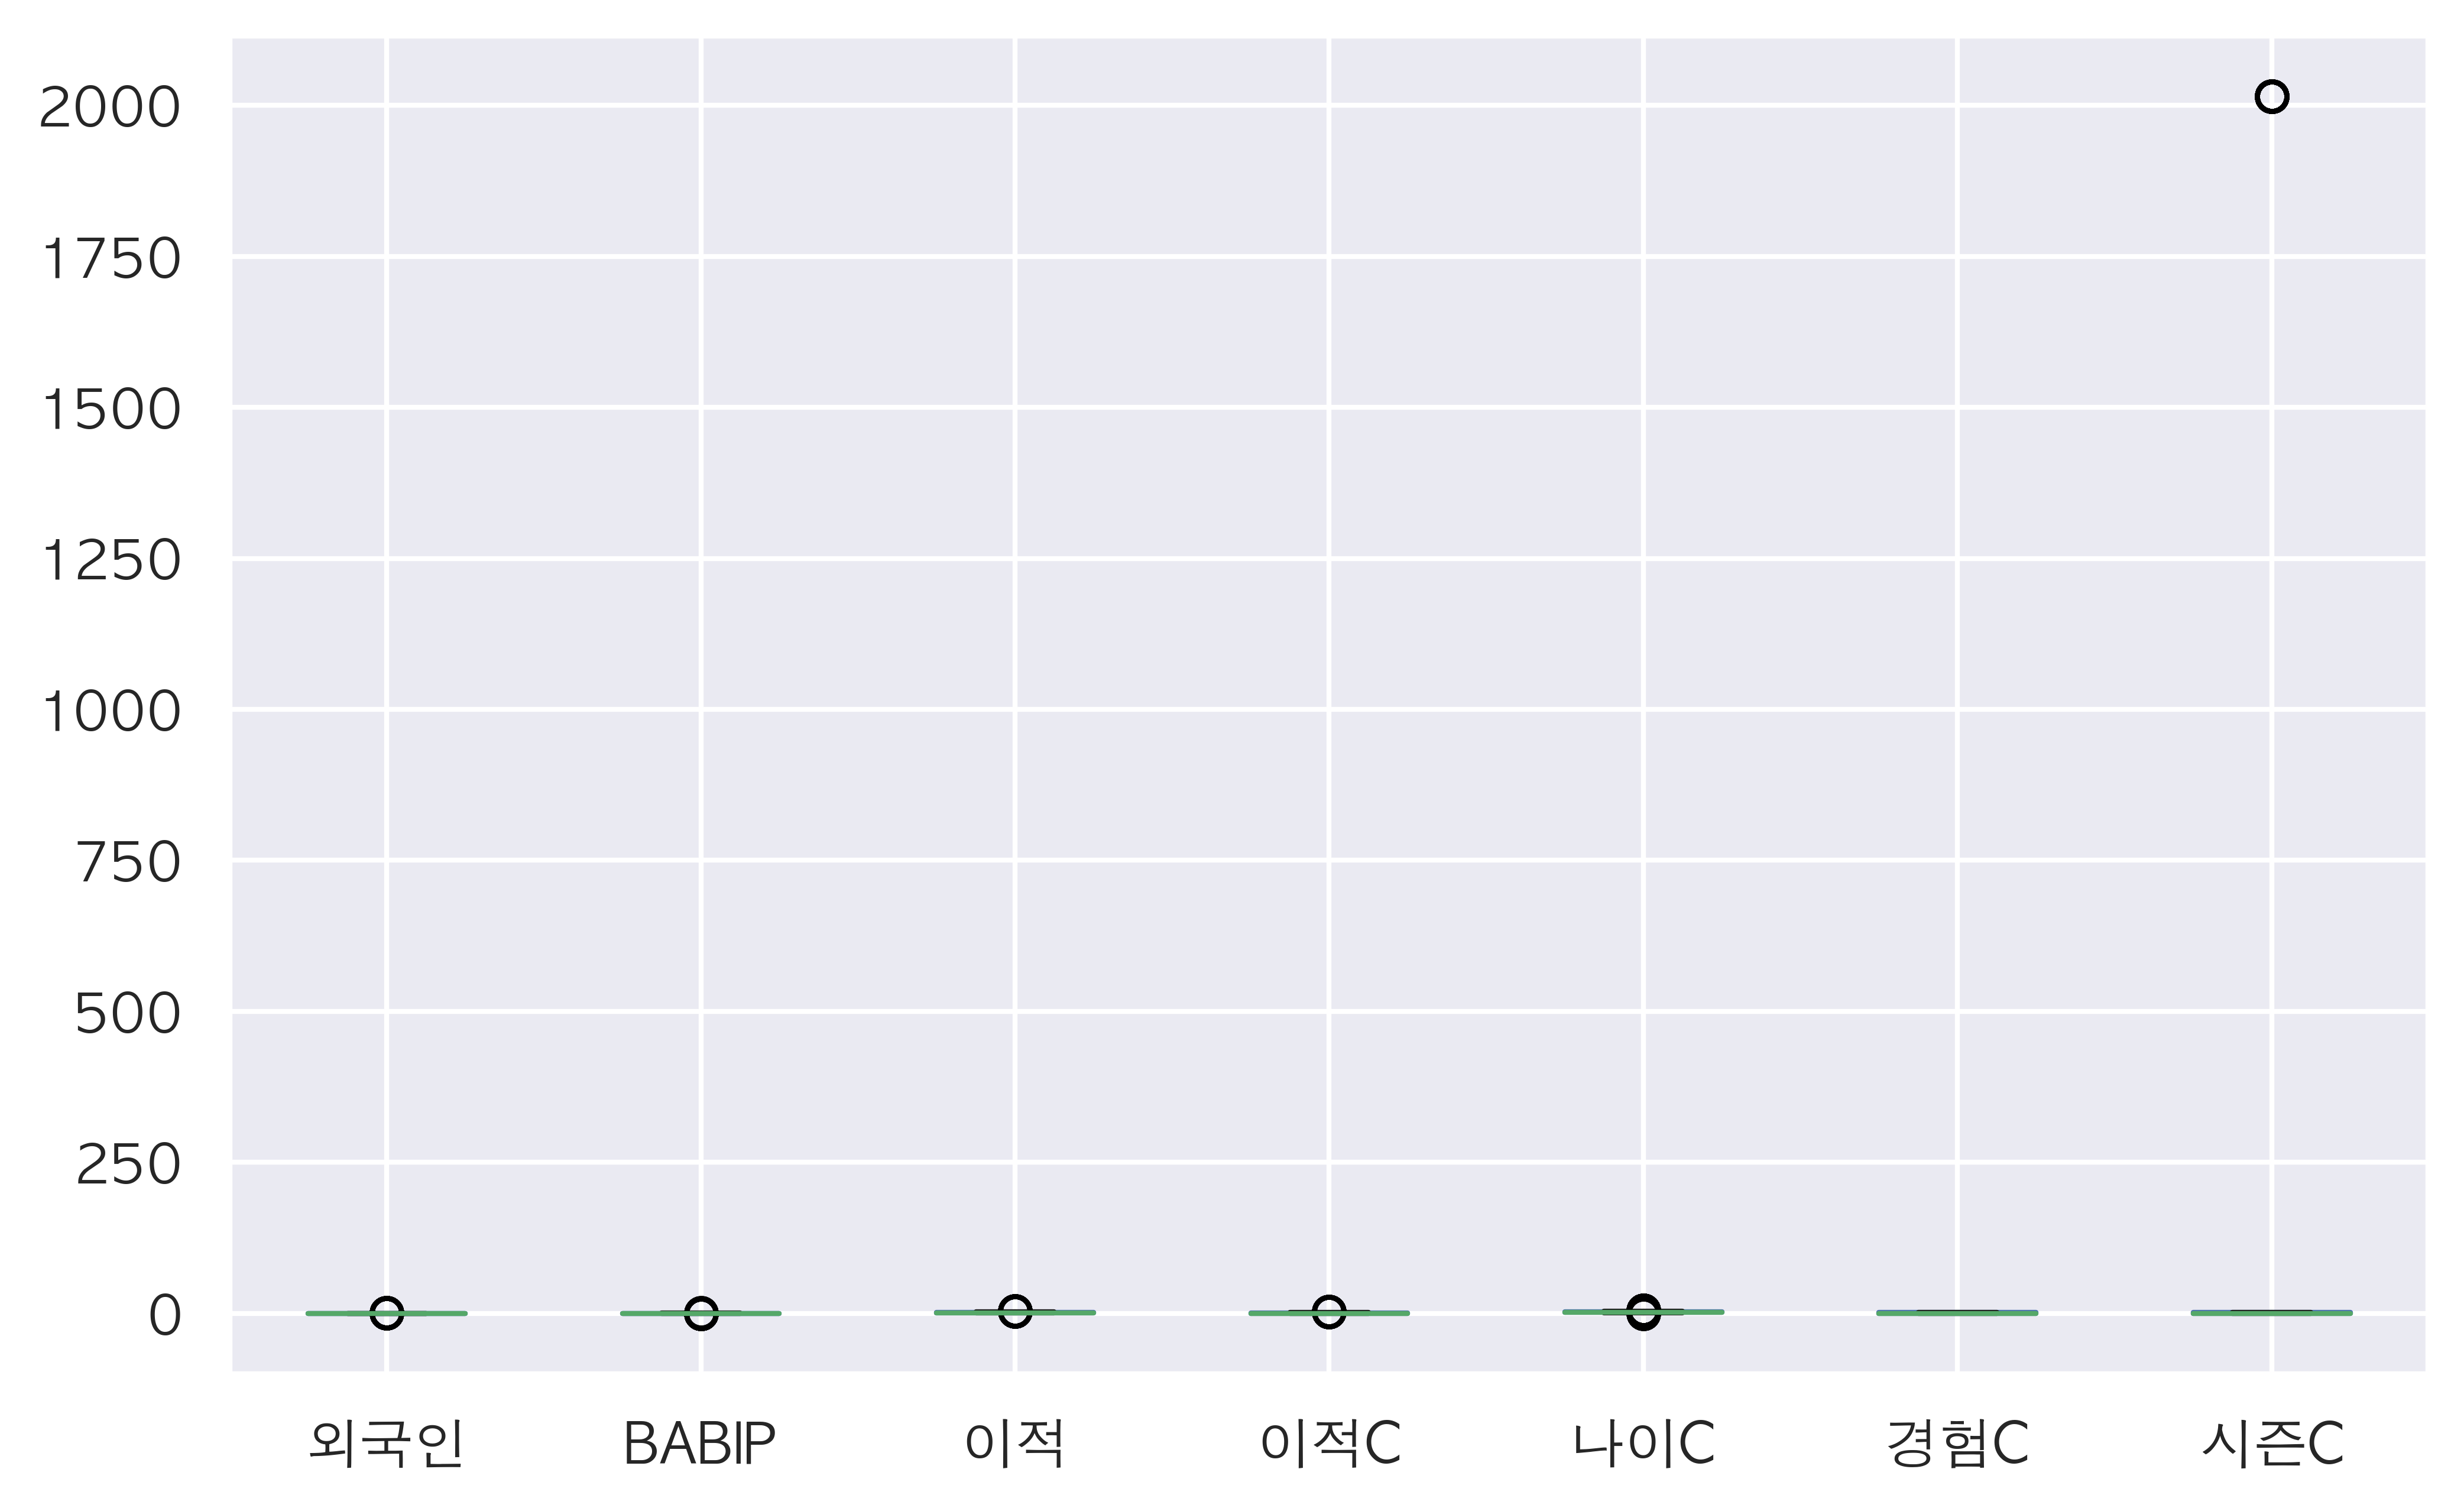

In [42]:
df[['외국인', 'BABIP', '이적', '이적C', '나이C', '경험C', '시즌C']].plot.box()
plt.show()

In [66]:
model = sm.OLS.from_formula(
    '로그연봉 ~ C(시즌C) + C(나이C):scale(횟수) + scale(G) + scale(홈런) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) + scale(경험N)', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   로그연봉   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     39.18
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           1.26e-82
Time:                        16:36:21   Log-Likelihood:                -139.92
No. Observations:                 376   AIC:                             327.8
Df Residuals:                     352   BIC:                             422.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.1755    

In [67]:
sm.stats.anova_lm(result, typ=2)

,sum_sq,df,F,PR(>F)
C(시즌C),10.942597,3.0,27.707643,4.145690e-16
C(외국인),4.614731,1.0,35.054745,7.618826e-09
C(이적C),2.355731,3.0,5.964923,5.631105e-04
C(나이C):scale(횟수),8.228970,6.0,10.418247,1.222474e-10
scale(G),1.421820,1.0,10.800527,1.116848e-03
scale(홈런),0.064127,1.0,0.487129,4.856717e-01
scale(루타),2.002616,1.0,15.212414,1.150701e-04
scale(도루),0.165350,1.0,1.256043,2.631655e-01
scale(고4),0.633144,1.0,4.809535,2.895645e-02
scale(타3),0.248267,1.0,1.885901,1.705390e-01


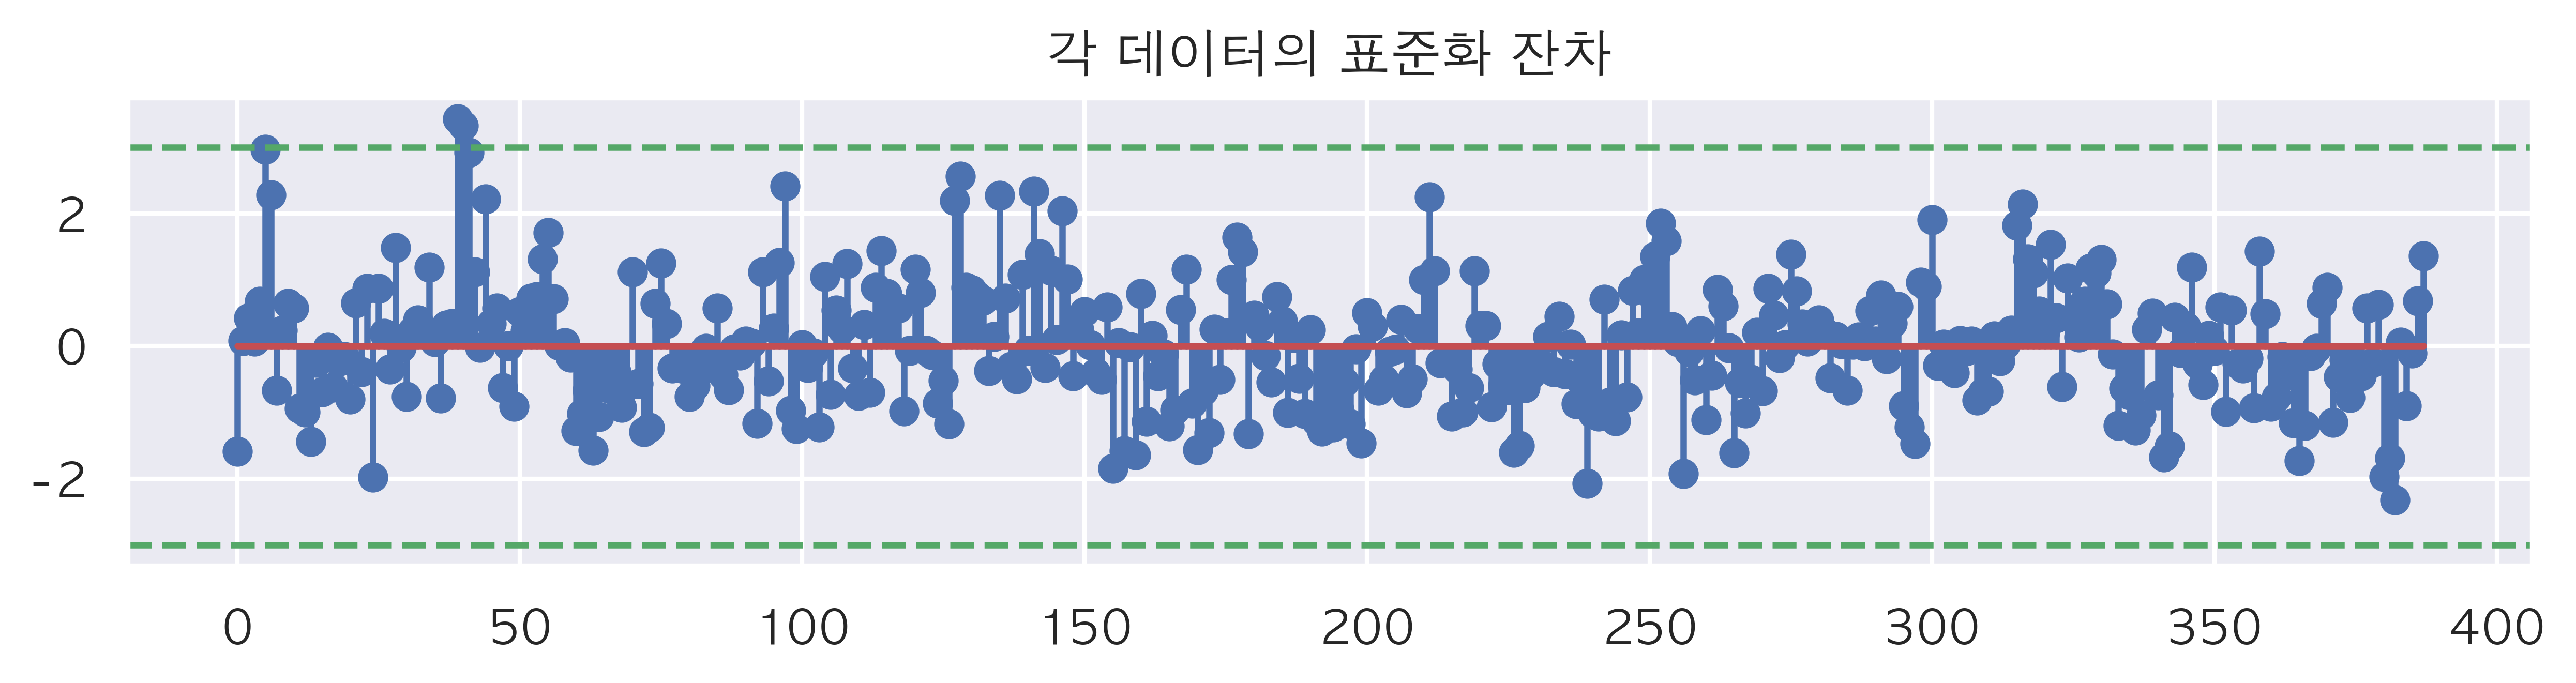

In [20]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show()

In [64]:
from sklearn.model_selection import KFold
scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    model = sm.OLS.from_formula(
        '로그연봉 ~ C(시즌C) + C(나이C) + scale(횟수) + scale(G) + scale(홈런) + scale(루타) + scale(도루) +scale(고4) + scale(타3) + C(외국인) + scale(BABIP) +C(이적C) + scale(ISOD) + scale(BBK) +scale(경험N)', data=df_train)
    result = model.fit()
    pred = result.predict(df_test)
    rss = ((df_test.로그연봉 - pred) ** 2).sum()
    tss = ((df_test.로그연봉 - df_test.로그연봉.mean()) ** 2).sum()
    rsquared = 1 - rss / tss
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.68544508, 검증 R2 = 0.68298372
학습 R2 = 0.72686824, 검증 R2 = 0.50816243
학습 R2 = 0.68923667, 검증 R2 = 0.70519107
학습 R2 = 0.70012119, 검증 R2 = 0.65348834
학습 R2 = 0.69979486, 검증 R2 = 0.62368803


In [53]:
# 아웃라이어 제거
cooks_d2, pvals = influence.cooks_distance
K = influence.k_vars
fox_cr = 4 / (len(df['OPS']) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]
idx2 = list(set(range(len(df))).difference(idx))
df1 = df.iloc[idx2, :].reset_index(drop=True)